In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)
%matplotlib inline

# Import Local Climatological Data (LCD)
Since the project weather data contained too many errors, the LCD data recorded at the Knoxville airport will be used.

Notebook outputs:
- df_lcd_hourly: contains hourly temp and humidity averages
- df_lcd_daily_avg: contains daily temp and humidity averages

In [2]:
df_lcd = pd.read_csv('./data/LCD/lcd_raw.csv', low_memory=False)
print(df_lcd.shape)
display(df_lcd.head())
display(df_lcd.info())

(175471, 6)


,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature,HourlyRelativeHumidity
0,72326013891,2011-01-01T00:05:00,FM-16,7,12.2,88
1,72326013891,2011-01-01T00:33:00,FM-16,7,12.2,94
2,72326013891,2011-01-01T00:53:00,FM-15,7,11.7,89
3,72326013891,2011-01-01T01:00:00,FM-12,4,11.7,89
4,72326013891,2011-01-01T01:39:00,FM-16,7,10.0,94


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175471 entries, 0 to 175470
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   STATION                   175471 non-null  int64 
 1   DATE                      175471 non-null  object
 2   REPORT_TYPE               175471 non-null  object
 3   SOURCE                    175471 non-null  object
 4   HourlyDryBulbTemperature  170598 non-null  object
 5   HourlyRelativeHumidity    170589 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.0+ MB


None

In [3]:
df_lcd.sample(5)

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature,HourlyRelativeHumidity
29515,72326013891,2013-01-16T09:53:00,FM-15,7,7.2,93
46802,72326013891,2014-03-23T11:53:00,FM-15,7,8.3,77
139688,72326013891,2020-09-25T19:00:00,FM-12,4,18.9,96
107208,72326013891,2018-06-24T04:53:00,FM-15,7,23.3,91
174064,72326013891,2023-02-23T17:53:00,FM-15,7,23.9,58


In [4]:
# change DATE dtype to datetime
df_lcd['date_time'] = pd.to_datetime(df_lcd.DATE, format='%Y-%m-%dT%H:%M:%S', errors='coerce')
df_lcd['date'] = df_lcd['date_time'].dt.date
df_lcd['date'] = pd.to_datetime(df_lcd['date'], format='%Y-%m-%d', errors='coerce')

display(df_lcd.head())
display(df_lcd.info())

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time,date
0,72326013891,2011-01-01T00:05:00,FM-16,7,12.2,88,2011-01-01 00:05:00,2011-01-01
1,72326013891,2011-01-01T00:33:00,FM-16,7,12.2,94,2011-01-01 00:33:00,2011-01-01
2,72326013891,2011-01-01T00:53:00,FM-15,7,11.7,89,2011-01-01 00:53:00,2011-01-01
3,72326013891,2011-01-01T01:00:00,FM-12,4,11.7,89,2011-01-01 01:00:00,2011-01-01
4,72326013891,2011-01-01T01:39:00,FM-16,7,10.0,94,2011-01-01 01:39:00,2011-01-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175471 entries, 0 to 175470
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   STATION                   175471 non-null  int64         
 1   DATE                      175471 non-null  object        
 2   REPORT_TYPE               175471 non-null  object        
 3   SOURCE                    175471 non-null  object        
 4   HourlyDryBulbTemperature  170598 non-null  object        
 5   HourlyRelativeHumidity    170589 non-null  object        
 6   date_time                 175471 non-null  datetime64[ns]
 7   date                      175471 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 10.7+ MB


None

In [5]:
# when temp and hum are missing
df_lcd_missing = df_lcd[(df_lcd.HourlyDryBulbTemperature.isnull()) | (df_lcd.HourlyRelativeHumidity.isnull())].copy()
df_lcd_missing.head()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time,date
66,72326013891,2011-01-01T23:59:00,SOD,6,NaN,NaN,2011-01-01 23:59:00,2011-01-01
102,72326013891,2011-01-02T23:59:00,SOD,6,NaN,NaN,2011-01-02 23:59:00,2011-01-02
135,72326013891,2011-01-03T23:59:00,SOD,6,NaN,NaN,2011-01-03 23:59:00,2011-01-03
168,72326013891,2011-01-04T23:59:00,SOD,6,NaN,NaN,2011-01-04 23:59:00,2011-01-04
229,72326013891,2011-01-05T23:59:00,SOD,6,NaN,NaN,2011-01-05 23:59:00,2011-01-05


In [6]:
print(df_lcd_missing.shape)
display(df_lcd_missing.describe(datetime_is_numeric=True))

(4882, 8)


,STATION,date_time,date
count,4.882000e+03,4882,4882
mean,7.232601e+10,2017-03-27 08:17:43.408439296,2017-03-26 09:08:19.959033344
min,7.232601e+10,2011-01-01 23:59:00,2011-01-01 00:00:00
25%,7.232601e+10,2014-03-27 05:59:00,2014-03-26 06:00:00
50%,7.232601e+10,2017-05-07 05:19:30,2017-05-07 00:00:00
75%,7.232601e+10,2020-03-29 17:59:00,2020-03-28 18:00:00
max,7.232601e+10,2023-03-31 23:59:00,2023-03-31 00:00:00
std,0.000000e+00,NaN,NaN


In [7]:
# drop rows with missing temp and hum values
df_lcd2 = df_lcd[~((df_lcd.HourlyDryBulbTemperature.isnull()) | (df_lcd.HourlyRelativeHumidity.isnull()))].copy()
print(len(df_lcd)-len(df_lcd2))
display(df_lcd2.info())

4882
<class 'pandas.core.frame.DataFrame'>
Int64Index: 170589 entries, 0 to 175468
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   STATION                   170589 non-null  int64         
 1   DATE                      170589 non-null  object        
 2   REPORT_TYPE               170589 non-null  object        
 3   SOURCE                    170589 non-null  object        
 4   HourlyDryBulbTemperature  170589 non-null  object        
 5   HourlyRelativeHumidity    170589 non-null  object        
 6   date_time                 170589 non-null  datetime64[ns]
 7   date                      170589 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 11.7+ MB


None

In [8]:
display(df_lcd2[(df_lcd2.HourlyDryBulbTemperature == '*') | (df_lcd2.HourlyRelativeHumidity == '*')])

# drop rows with '*' in temp and hum columns
df_lcd3 = df_lcd2[~((df_lcd2.HourlyDryBulbTemperature == '*') | (df_lcd2.HourlyRelativeHumidity == '*'))]

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time,date
174431,72326013891,2023-03-03T15:53:00,FM-15,7,*,*,2023-03-03 15:53:00,2023-03-03
175238,72326013891,2023-03-25T02:53:00,FM-15,7,*,*,2023-03-25 02:53:00,2023-03-25


In [9]:
# convert temp and hum dtype to float
df_lcd3 = df_lcd3.astype({'HourlyDryBulbTemperature':'float','HourlyRelativeHumidity':'float'})
display(df_lcd3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170587 entries, 0 to 175468
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   STATION                   170587 non-null  int64         
 1   DATE                      170587 non-null  object        
 2   REPORT_TYPE               170587 non-null  object        
 3   SOURCE                    170587 non-null  object        
 4   HourlyDryBulbTemperature  170587 non-null  float64       
 5   HourlyRelativeHumidity    170587 non-null  float64       
 6   date_time                 170587 non-null  datetime64[ns]
 7   date                      170587 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 11.7+ MB


None

In [10]:
display(df_lcd3.nunique())
print(df_lcd3.REPORT_TYPE.unique())
print(df_lcd3.SOURCE.unique())

STATION                          1
DATE                        170346
REPORT_TYPE                      4
SOURCE                           3
HourlyDryBulbTemperature       105
HourlyRelativeHumidity          88
date_time                   170346
date                          4473
dtype: int64

['FM-16' 'FM-15' 'FM-12' 'SY-MT']
['7' '4' '6']


In [11]:
df_lcd3.describe(datetime_is_numeric=True)

,STATION,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time,date
count,1.705870e+05,170587.000000,170587.000000,170587,170587
mean,7.232601e+10,15.244246,73.040882,2017-02-06 03:08:11.606629120,2017-02-05 15:10:25.067560704
min,7.232601e+10,-17.200000,12.000000,2011-01-01 00:05:00,2011-01-01 00:00:00
25%,7.232601e+10,8.300000,58.000000,2014-01-04 06:23:00,2014-01-04 00:00:00
50%,7.232601e+10,16.100000,76.000000,2017-02-04 19:00:00,2017-02-04 00:00:00
75%,7.232601e+10,22.200000,90.000000,2020-03-03 06:48:30,2020-03-03 00:00:00
max,7.232601e+10,40.600000,100.000000,2023-03-31 23:53:00,2023-03-31 00:00:00
std,0.000000e+00,9.278899,19.726403,NaN,NaN


## Create hourly data

In [12]:
df_lcd3.head(10)

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time,date
0,72326013891,2011-01-01T00:05:00,FM-16,7,12.2,88.0,2011-01-01 00:05:00,2011-01-01
1,72326013891,2011-01-01T00:33:00,FM-16,7,12.2,94.0,2011-01-01 00:33:00,2011-01-01
2,72326013891,2011-01-01T00:53:00,FM-15,7,11.7,89.0,2011-01-01 00:53:00,2011-01-01
3,72326013891,2011-01-01T01:00:00,FM-12,4,11.7,89.0,2011-01-01 01:00:00,2011-01-01
4,72326013891,2011-01-01T01:39:00,FM-16,7,10.0,94.0,2011-01-01 01:39:00,2011-01-01
5,72326013891,2011-01-01T01:51:00,FM-16,6,10.0,94.0,2011-01-01 01:51:00,2011-01-01
6,72326013891,2011-01-01T01:53:00,FM-15,7,10.6,92.0,2011-01-01 01:53:00,2011-01-01
7,72326013891,2011-01-01T02:53:00,FM-15,7,10.6,92.0,2011-01-01 02:53:00,2011-01-01
8,72326013891,2011-01-01T03:31:00,FM-16,7,10.0,94.0,2011-01-01 03:31:00,2011-01-01
9,72326013891,2011-01-01T03:34:00,FM-16,7,10.0,94.0,2011-01-01 03:34:00,2011-01-01


In [38]:
# create hour column from date_time column
df_lcd3['hour'] = pd.to_datetime(df_lcd3.date_time.dt.hour.astype(str), format='%H').dt.time
display(df_lcd3.head())
df_lcd3.info()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time,date,hour
0,72326013891,2011-01-01T00:05:00,FM-16,7,12.2,88.0,2011-01-01 00:05:00,2011-01-01,00:00:00
1,72326013891,2011-01-01T00:33:00,FM-16,7,12.2,94.0,2011-01-01 00:33:00,2011-01-01,00:00:00
2,72326013891,2011-01-01T00:53:00,FM-15,7,11.7,89.0,2011-01-01 00:53:00,2011-01-01,00:00:00
3,72326013891,2011-01-01T01:00:00,FM-12,4,11.7,89.0,2011-01-01 01:00:00,2011-01-01,01:00:00
4,72326013891,2011-01-01T01:39:00,FM-16,7,10.0,94.0,2011-01-01 01:39:00,2011-01-01,01:00:00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 170587 entries, 0 to 175468
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   STATION                   170587 non-null  int64         
 1   DATE                      170587 non-null  object        
 2   REPORT_TYPE               170587 non-null  object        
 3   SOURCE                    170587 non-null  object        
 4   HourlyDryBulbTemperature  170587 non-null  float64       
 5   HourlyRelativeHumidity    170587 non-null  float64       
 6   date_time                 170587 non-null  datetime64[ns]
 7   date                      170587 non-null  datetime64[ns]
 8   hour                      170587 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 13.0+ MB


In [39]:
df_lcd_hourly = df_lcd3.groupby([df_lcd3.date, df_lcd3.hour])[['HourlyDryBulbTemperature', 
                                                                         'HourlyRelativeHumidity']].mean().reset_index()
df_lcd_hourly.shape
df_lcd_hourly.sort_values(['date', 'hour'], inplace=True)

In [40]:
display(df_lcd_hourly.head())
display(df_lcd_hourly.tail())

,date,hour,HourlyDryBulbTemperature,HourlyRelativeHumidity
0,2011-01-01,00:00:00,12.033333,90.333333
1,2011-01-01,01:00:00,10.575000,92.250000
2,2011-01-01,02:00:00,10.600000,92.000000
3,2011-01-01,03:00:00,10.425000,92.000000
4,2011-01-01,04:00:00,10.340000,92.800000


,date,hour,HourlyDryBulbTemperature,HourlyRelativeHumidity
107335,2023-03-31,19:00:00,16.7,86.0
107336,2023-03-31,20:00:00,17.2,84.0
107337,2023-03-31,21:00:00,18.9,68.0
107338,2023-03-31,22:00:00,20.3,63.5
107339,2023-03-31,23:00:00,21.7,61.0


In [41]:
df_lcd_hourly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107340 entries, 0 to 107339
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      107340 non-null  datetime64[ns]
 1   hour                      107340 non-null  object        
 2   HourlyDryBulbTemperature  107340 non-null  float64       
 3   HourlyRelativeHumidity    107340 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.1+ MB


<AxesSubplot: xlabel='date'>

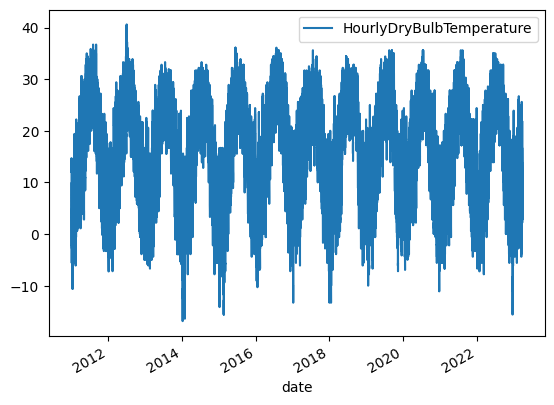

In [42]:
# plot temp
ax = plt.gca() 
df_lcd_hourly.plot( x = 'date' , y = 'HourlyDryBulbTemperature', ax = ax)

<AxesSubplot: xlabel='date'>

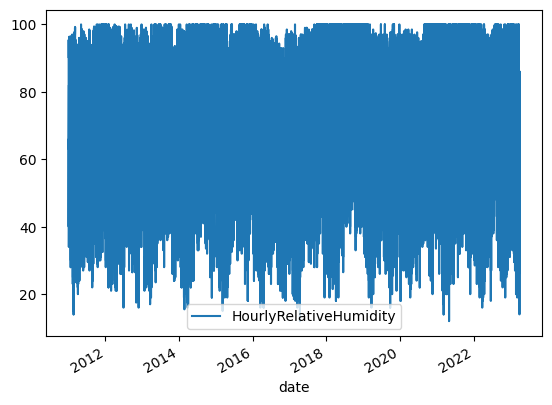

In [43]:
# plot hum
ax = plt.gca() 
df_lcd_hourly.plot( x = 'date' , y = 'HourlyRelativeHumidity', ax = ax)

In [49]:
# combine date and hour columsn into date_time column
df_lcd_hourly['date_time'] = df_lcd_hourly.date.dt.strftime('%Y-%m-%d') +' '+df_lcd_hourly.hour.astype(str)
display(df_lcd_hourly.head())
df_lcd_hourly['date_time'] = pd.to_datetime(df_lcd_hourly['date_time'], errors='coerce')
display(df_lcd_hourly.head())
display(df_lcd_hourly.tail())
df_lcd_hourly.info()

,date,hour,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time
0,2011-01-01,00:00:00,12.033333,90.333333,2011-01-01 00:00:00
1,2011-01-01,01:00:00,10.575000,92.250000,2011-01-01 01:00:00
2,2011-01-01,02:00:00,10.600000,92.000000,2011-01-01 02:00:00
3,2011-01-01,03:00:00,10.425000,92.000000,2011-01-01 03:00:00
4,2011-01-01,04:00:00,10.340000,92.800000,2011-01-01 04:00:00


,date,hour,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time
0,2011-01-01,00:00:00,12.033333,90.333333,2011-01-01 00:00:00
1,2011-01-01,01:00:00,10.575000,92.250000,2011-01-01 01:00:00
2,2011-01-01,02:00:00,10.600000,92.000000,2011-01-01 02:00:00
3,2011-01-01,03:00:00,10.425000,92.000000,2011-01-01 03:00:00
4,2011-01-01,04:00:00,10.340000,92.800000,2011-01-01 04:00:00


,date,hour,HourlyDryBulbTemperature,HourlyRelativeHumidity,date_time
107335,2023-03-31,19:00:00,16.7,86.0,2023-03-31 19:00:00
107336,2023-03-31,20:00:00,17.2,84.0,2023-03-31 20:00:00
107337,2023-03-31,21:00:00,18.9,68.0,2023-03-31 21:00:00
107338,2023-03-31,22:00:00,20.3,63.5,2023-03-31 22:00:00
107339,2023-03-31,23:00:00,21.7,61.0,2023-03-31 23:00:00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 107340 entries, 0 to 107339
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      107340 non-null  datetime64[ns]
 1   hour                      107340 non-null  object        
 2   HourlyDryBulbTemperature  107340 non-null  float64       
 3   HourlyRelativeHumidity    107340 non-null  float64       
 4   date_time                 107340 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 4.9+ MB


In [47]:
df_lcd_hourly.loc[:,['date_time', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity']].head()

,date_time,HourlyDryBulbTemperature,HourlyRelativeHumidity
0,2011-01-01 00:00:00,12.033333,90.333333
1,2011-01-01 01:00:00,10.575000,92.250000
2,2011-01-01 02:00:00,10.600000,92.000000
3,2011-01-01 03:00:00,10.425000,92.000000
4,2011-01-01 04:00:00,10.340000,92.800000


In [48]:
# save data
df_lcd_hourly.loc[:,['date_time', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity']].to_pickle('./data/LCD/lcd_hourly.pkl')

## Daily averages 

In [69]:
df_lcd_avg = df_lcd3.groupby(['date'])[['HourlyDryBulbTemperature', 'HourlyRelativeHumidity']].mean().reset_index()
df_lcd_avg.sort_values('date', inplace=True)
print(df_lcd_avg.shape)
display(df_lcd_avg.head())
display(df_lcd_avg.tail())

(4473, 3)


,date,HourlyDryBulbTemperature,HourlyRelativeHumidity
0,2011-01-01,11.472727,91.803030
1,2011-01-02,3.828571,64.628571
2,2011-01-03,-0.068750,57.812500
3,2011-01-04,3.084375,60.156250
4,2011-01-05,1.008333,83.216667


,date,HourlyDryBulbTemperature,HourlyRelativeHumidity
4468,2023-03-27,18.935294,53.558824
4469,2023-03-28,12.118750,59.468750
4470,2023-03-29,10.040625,49.000000
4471,2023-03-30,12.561290,39.645161
4472,2023-03-31,15.618750,63.562500


In [70]:
df_lcd_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4473 entries, 0 to 4472
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      4473 non-null   datetime64[ns]
 1   HourlyDryBulbTemperature  4473 non-null   float64       
 2   HourlyRelativeHumidity    4473 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 139.8 KB


<AxesSubplot: xlabel='date'>

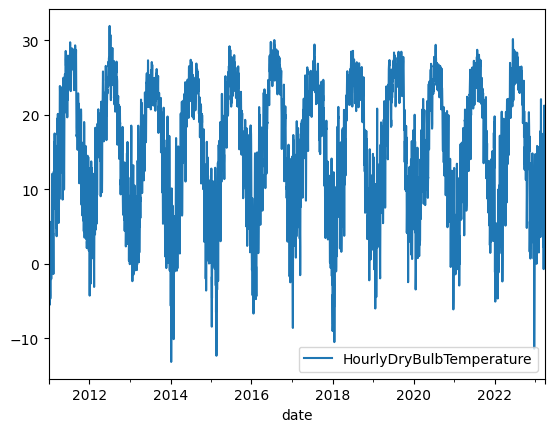

In [71]:
ax = plt.gca() 
df_lcd_avg.plot( x = 'date' , y = 'HourlyDryBulbTemperature', ax = ax)